In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/textdb3/fake_or_real_news.csv


First we are importing our necessary libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Next, we we'll be reading the csv file data into a dataframe

In [5]:
news_df=pd.read_csv('/kaggle/input/textdb3/fake_or_real_news.csv')

In [6]:
#getting the first few rows of our data
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
#getting the last rows of our data
news_df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [8]:
#getting the shape of our data 
news_df.shape

(6335, 4)

So, there are 6335 rows and 4 columns

In [9]:
news=news_df.label
news.value_counts()
news

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [10]:
#getting the count of occurences of number of fake and real in the labels coulmn
news_df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

So, There are 3171 Real and 3164 Fake values in label column

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

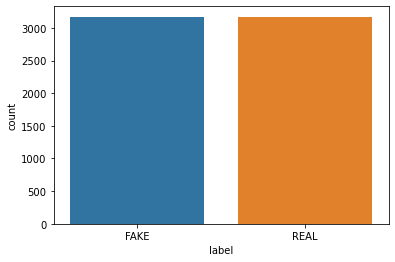

In [11]:
#visualizing the count of Real and Fake values
sns.countplot(news_df['label'])

In [12]:
#we'll now split our dataset into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(news_df['text'], news, test_size=0.2, random_state=7)

We'll now initialize a Tfidf Vectorizer with stop words from the English language and a maximum document frequency of 0.7 . Tf means term frequency as in how many times a word is appearing in the text file. 
Tf=(Number of repetition of a word in text/Number of words in the text). 

idf is Inverse Document Frequency which is used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. 
idf = log(number of texts(document frequency)/ Number of texts containg that word). 

Then, tfidf creates a document term matrix where it has columns for each individual word and there are cells containing the weight of each unique word signifying how important that word is for that text.
tfidf = tf * idf

In [16]:
tfidf=TfidfVectorizer(stop_words='english', max_df=0.7)

stop_words="english" means the words in English language that ain't give much meaning to the text and can be safely ignored

max_df = 0.7 means that we will be including only those words that occur in a maximum of 70% of all the documents. Words that occur in almost every document are usually not suitable for classification because they do not provide any unique information about the document.

In [17]:
tfidf_train=tfidf.fit_transform(x_train) #fit and transform the train dataset
tfidf_test=tfidf.transform(x_test)       #transform the test dataset

In [18]:
tfidf_train.shape

(5068, 61651)

There are 5068 rows in train dataset 

In [19]:
tfidf_test.shape

(1267, 61651)

There are 1267 rows in test dataset

We’ll now initialize a PassiveAggressiveClassifier. 
PassiveAgressiveClassifier is a classification algorithm in Machine Learning based on online learning Algorithm. Passive is for correct predictions or classifications, in this the model does not go through changes and is kept as it is and Agressive is for incorrect predictions,in this the model is changed 

We’ll fit this on tfidf_train and y_train.
Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() and a confusion matrix to see the performance of the model.

In [27]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
pac_acc=round(score*100,2)
print(f'Accuracy: {pac_acc}%')

Accuracy: 92.9%


In [28]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(tfidf_train,y_train)
y_pred2=dec.predict(tfidf_test)
score2=accuracy_score(y_test,y_pred2)
dec_acc=round(score2*100,2)
print(f'Accuracy: {dec_acc}%')

Accuracy: 81.37%


In [29]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(tfidf_train,y_train)
y_pred3=ran.predict(tfidf_test)
score3=accuracy_score(y_test,y_pred3)
ran_acc=round(score3*100,2)
print(f'Accuracy: {ran_acc}%')

Accuracy: 89.98%


In [30]:
labels={'PassiveAggressiveClassifier':pac_acc,'DecisionTreeClassifier':dec_acc,'RandomForestClassifier':ran_acc}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 92.9
DecisionTreeClassifier : 81.37
RandomForestClassifier : 89.98


<BarContainer object of 3 artists>

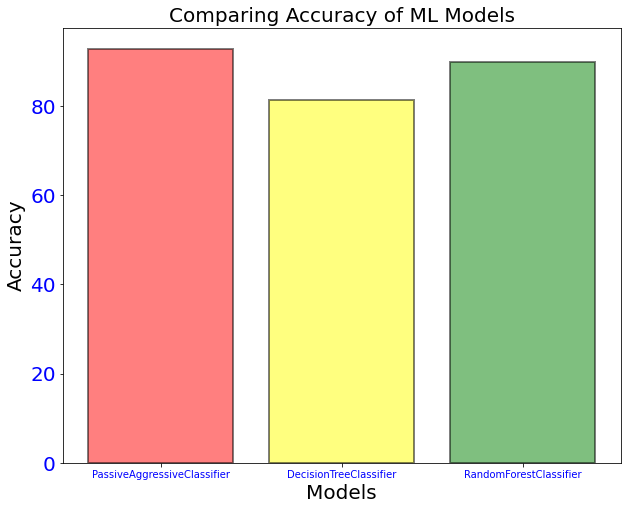

In [31]:
plt.figure(figsize=(10,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','green']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

In [32]:
pac_con=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print("Confusion Matrix for PassiveAgressiveClassifier",end="\n")
print(pac_con)

Confusion Matrix for PassiveAgressiveClassifier
[[590  48]
 [ 42 587]]


In [1]:
dec_con=confusion_matrix(y_test,y_pred2, labels=['FAKE','REAL'])
print("Confusion Matrix for DecisionTreeClassifier",end="\n")
print(dec_con)

NameError: name 'confusion_matrix' is not defined

In [34]:
ran_con=confusion_matrix(y_test,y_pred3, labels=['FAKE','REAL'])
print("Confusion Matrix for RandomForestClassifier",end="\n")
print(ran_con)

Confusion Matrix for DecisionTreeClassifier
[[590  48]
 [ 42 587]]
